In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
coordinates = list(lats_lngs)
coordinates

[(-2.6104848769321194, -162.70700895598998),
 (-37.48212180852078, -44.895816250581476),
 (-26.526584438537242, -65.88732412690761),
 (-27.520535038694845, 172.29407280142482),
 (54.62841385991166, 109.68944874177294),
 (-18.602892186350743, -60.88127666514579),
 (-57.282298289911836, -27.530654073581275),
 (-59.819931903825825, 69.35609747463045),
 (25.61714701348069, -52.14234426705728),
 (2.5976714465143402, -62.99965356837919),
 (2.0833928512387985, -104.30839875915626),
 (36.702462339852275, 64.78548002730136),
 (51.56904477294228, -24.66495219728094),
 (-58.63553367589629, 52.527912534918784),
 (-76.2539309479133, -49.847562134403574),
 (78.52746401590102, -49.47605203584558),
 (-14.147253624593404, 170.63670911050627),
 (5.242133401694801, 54.449603569119915),
 (41.157634162169614, -23.505894899761643),
 (4.582620415024394, -28.030442860996544),
 (-55.53194760936924, 78.6273445324249),
 (-81.61936145085829, 106.04655637988515),
 (78.1660762813193, -80.64859270570248),
 (63.18438

In [4]:
from citipy import citipy

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities: 
        cities.append(city)
len(cities)

                    

630

In [6]:
import requests as req
from config import weather_api_key 

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1b5c7e3a0d8898b984478bf2bc3e2ae


In [8]:
from datetime import datetime 

In [9]:
city_data = []
print('Beginning Data Retrieval    ')
print('----------------------------')


record_count = 1 
set_count = 1 

for i, city in enumerate(cities):
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    city_url = url + "&q=" + city.replace(" ", "+")
    
    
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    record_count += 1
    try: 
        city_weather = req.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y - %m - %d %H:%M:%S')
        city_data.append({'City': city.title(),
                         'Country': city_country,
                         'Lat': city_lat,
                         'Lon': city_lon,
                         'Max Temp': city_max_temp,
                         'Wind': city_wind,
                         'Humidity': city_humidity,
                         'Cloudiness': city_clouds,
                         'Wind Speed': city_wind,
                         'Date': city_date})   
    except: 
        
        print('City not found. Skipping...')
        
        pass
    
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1 | samusu
City not found. Skipping...
Processing Record 2 of set 1 | rio grande
Processing Record 3 of set 1 | tucuman
Processing Record 4 of set 1 | vao
Processing Record 5 of set 1 | kurumkan
Processing Record 6 of set 1 | san jose
Processing Record 7 of set 1 | chuy
Processing Record 8 of set 1 | saint-philippe
Processing Record 9 of set 1 | codrington
Processing Record 10 of set 1 | boa vista
Processing Record 11 of set 1 | puerto ayora
Processing Record 12 of set 1 | dawlatabad
Processing Record 13 of set 1 | grindavik
Processing Record 14 of set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of set 1 | ushuaia
Processing Record 16 of set 1 | upernavik
Processing Record 17 of set 1 | sola
Processing Record 18 of set 1 | eyl
Processing Record 19 of set 1 | vila franca do campo
Processing Record 20 of set 1 | sao filipe
Processing Record 21 of set 1 | mahebourg
Processing Record 22 

Processing Record 37 of set 4 | elbrus
Processing Record 38 of set 4 | marzuq
Processing Record 39 of set 4 | coquimbo
Processing Record 40 of set 4 | carnarvon
Processing Record 41 of set 4 | bredasdorp
Processing Record 42 of set 4 | yenagoa
Processing Record 43 of set 4 | siguatepeque
Processing Record 44 of set 4 | zhaotong
Processing Record 45 of set 4 | naze
Processing Record 46 of set 4 | fomboni
Processing Record 47 of set 4 | tambacounda
Processing Record 48 of set 4 | shingu
Processing Record 49 of set 4 | wilmington
Processing Record 50 of set 4 | zonguldak
Processing Record 1 of set 5 | magadan
Processing Record 2 of set 5 | elat
Processing Record 3 of set 5 | longview
Processing Record 4 of set 5 | fortuna
Processing Record 5 of set 5 | sitka
Processing Record 6 of set 5 | norman wells
Processing Record 7 of set 5 | rawannawi
City not found. Skipping...
Processing Record 8 of set 5 | inuvik
Processing Record 9 of set 5 | kabo
Processing Record 10 of set 5 | chore
City not 

Processing Record 29 of set 8 | novikovo
Processing Record 30 of set 8 | benghazi
Processing Record 31 of set 8 | bantou
Processing Record 32 of set 8 | portland
Processing Record 33 of set 8 | dudinka
Processing Record 34 of set 8 | korem
Processing Record 35 of set 8 | ilulissat
Processing Record 36 of set 8 | ayan
Processing Record 37 of set 8 | srednekolymsk
Processing Record 38 of set 8 | alice springs
Processing Record 39 of set 8 | tawang
Processing Record 40 of set 8 | asosa
Processing Record 41 of set 8 | pochutla
Processing Record 42 of set 8 | aflu
City not found. Skipping...
Processing Record 43 of set 8 | barbastro
Processing Record 44 of set 8 | beira
Processing Record 45 of set 8 | podor
Processing Record 46 of set 8 | port hueneme
Processing Record 47 of set 8 | port blair
Processing Record 48 of set 8 | tukrah
Processing Record 49 of set 8 | tokoroa
Processing Record 50 of set 8 | poronaysk
Processing Record 1 of set 9 | jiuquan
Processing Record 2 of set 9 | zhigansk


Processing Record 17 of set 12 | ostersund
Processing Record 18 of set 12 | alofi
Processing Record 19 of set 12 | parambu
Processing Record 20 of set 12 | pierre
Processing Record 21 of set 12 | vienne
Processing Record 22 of set 12 | richards bay
Processing Record 23 of set 12 | stornoway
Processing Record 24 of set 12 | yar-sale
Processing Record 25 of set 12 | walvis bay
Processing Record 26 of set 12 | coahuayana
Processing Record 27 of set 12 | sassandra
Processing Record 28 of set 12 | smiltene
Processing Record 29 of set 12 | kpagouda
City not found. Skipping...
Processing Record 30 of set 12 | bandarbeyla
Processing Record 31 of set 12 | san andres
Processing Record 32 of set 12 | sorvag
City not found. Skipping...
Processing Record 33 of set 12 | krasnoselkup
Processing Record 34 of set 12 | labutta
City not found. Skipping...
Processing Record 35 of set 12 | port hardy
Processing Record 36 of set 12 | half moon bay
Processing Record 37 of set 12 | gravdal
Processing Record 3

In [10]:
print(len(city_data))

578


In [11]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Lat,Lon,Max Temp,Wind,Humidity,Cloudiness,Wind Speed,Date
0,Rio Grande,BR,-32.0350,-52.0986,59.11,11.34,88,100,11.34,2021 - 07 - 15 20:11:36
1,Tucuman,AR,-26.8241,-65.2226,69.80,4.61,35,0,4.61,2021 - 07 - 15 20:11:37
2,Vao,NC,-22.6667,167.4833,71.08,12.19,81,11,12.19,2021 - 07 - 15 20:11:37
3,Kurumkan,RU,54.3000,110.3000,57.88,2.66,87,6,2.66,2021 - 07 - 15 20:11:38
4,San Jose,US,37.3394,-121.8950,85.86,10.36,50,1,10.36,2021 - 07 - 15 20:08:23
5,Chuy,UY,-33.6971,-53.4616,55.87,6.31,82,1,6.31,2021 - 07 - 15 20:11:38
6,Saint-Philippe,RE,-21.3585,55.7679,71.19,11.39,78,41,11.39,2021 - 07 - 15 20:11:39
7,Codrington,AU,-38.2667,141.9667,49.51,14.88,90,100,14.88,2021 - 07 - 15 20:11:39
8,Boa Vista,BR,2.8197,-60.6733,85.98,3.44,62,75,3.44,2021 - 07 - 15 20:11:40
9,Puerto Ayora,EC,-0.7393,-90.3518,72.55,1.99,88,52,1.99,2021 - 07 - 15 20:11:40


In [12]:
new_city_data_column = ['City', 'Country', 'Date', 'Lat', 'Lon', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']


In [13]:
city_data_df = city_data_df[new_city_data_column]
city_data_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rio Grande,BR,2021 - 07 - 15 20:11:36,-32.0350,-52.0986,59.11,88,100,11.34
1,Tucuman,AR,2021 - 07 - 15 20:11:37,-26.8241,-65.2226,69.80,35,0,4.61
2,Vao,NC,2021 - 07 - 15 20:11:37,-22.6667,167.4833,71.08,81,11,12.19
3,Kurumkan,RU,2021 - 07 - 15 20:11:38,54.3000,110.3000,57.88,87,6,2.66
4,San Jose,US,2021 - 07 - 15 20:08:23,37.3394,-121.8950,85.86,50,1,10.36
...,...,...,...,...,...,...,...,...,...
573,Koutsouras,GR,2021 - 07 - 15 20:15:20,35.0339,25.9469,79.38,60,0,8.57
574,Kumluca,TR,2021 - 07 - 15 20:15:20,36.3703,30.2869,88.12,37,0,7.65
575,Lata,PT,2021 - 07 - 15 20:15:21,40.1629,-8.3327,75.34,40,8,2.84
576,Kudahuvadhoo,MV,2021 - 07 - 15 20:15:21,2.6708,72.8944,82.29,74,57,7.78


In [14]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [16]:
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

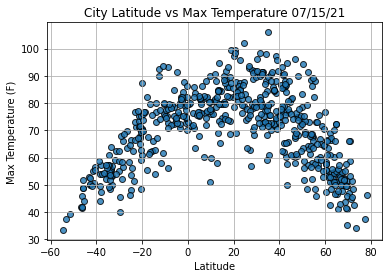

In [27]:
import time 

plt.scatter(lats, 
           max_temps,
           edgecolor = 'black', linewidths = 1, marker = 'o',
           alpha = 0.8, label = 'Citites')

plt.title(f'City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig1.png')

plt.show()

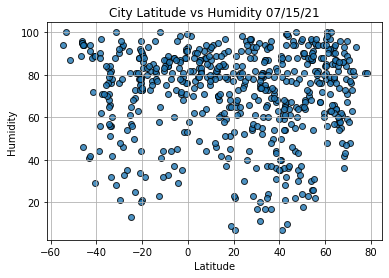

In [28]:
plt.scatter(lats,
           humidity,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig2.png')

plt.show()

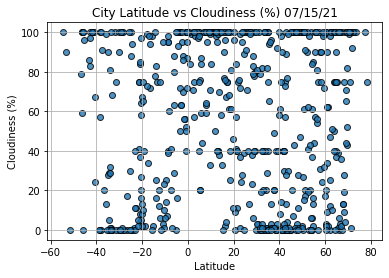

In [31]:
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig3.png')

plt.show()

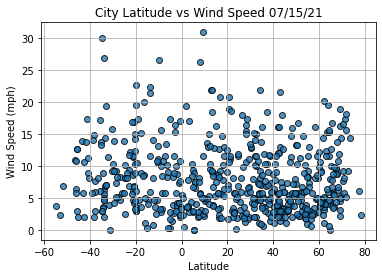

In [32]:
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black', linewidth = 1, marker = 'o',
           alpha = 0.8, label = 'Cities')

plt.title(f'City Latitude vs Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

plt.savefig('weather_data/Fig4.png')

plt.show()